## Дисперсионный анализ для оценки результатов экспериментов

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
import scipy.stats as st
from scipy.stats import levene, shapiro
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [33]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,5)}
        )

### Задача 1
В первом эксперименте тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные двух типов, либо новые квадратные.
    Проанализировать результаты

In [6]:
path = 'https://stepik.org/media/attachments/lesson/385920/5_task_1.csv'

In [7]:
test1 = pd.read_csv(path) #, parse_dates=['timestamp'])
test1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [8]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      30000 non-null  int64 
 1   group   30000 non-null  object
 2   events  30000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 703.2+ KB


In [9]:
test1.isna().sum()

id        0
group     0
events    0
dtype: int64

In [10]:
test1.group.value_counts()

C    10000
B    10000
A    10000
Name: group, dtype: int64

In [11]:
# три подвыборки равной величины
g_A = test1[test1.group == 'A']
g_B = test1[test1.group == 'B']
g_C = test1[test1.group == 'C']

In [24]:
# с помощью теста Левена проверяем равенство дисперсий подвыборок

stat, p = levene(g_A.events, g_B.events, g_C.events)
p

0.1041327199523974

In [22]:
# для контроля то же самое с помощью теста Барлетта

stat, p = bartlett(g_A.events, g_B.events, g_C.events)
p

# дисперсии гомогенны, так как уровень значимости больше 0.05

0.06791847250183118

In [27]:
# с помощью теста Шапиро-Уилка проверяем нормальность распределения (отберем по 1000 наблюдений, чтобы тест давал адекватный резальтат)
shapiro(g_A.events.sample(1000, random_state=17))

(0.9973153471946716, 0.09609563648700714)

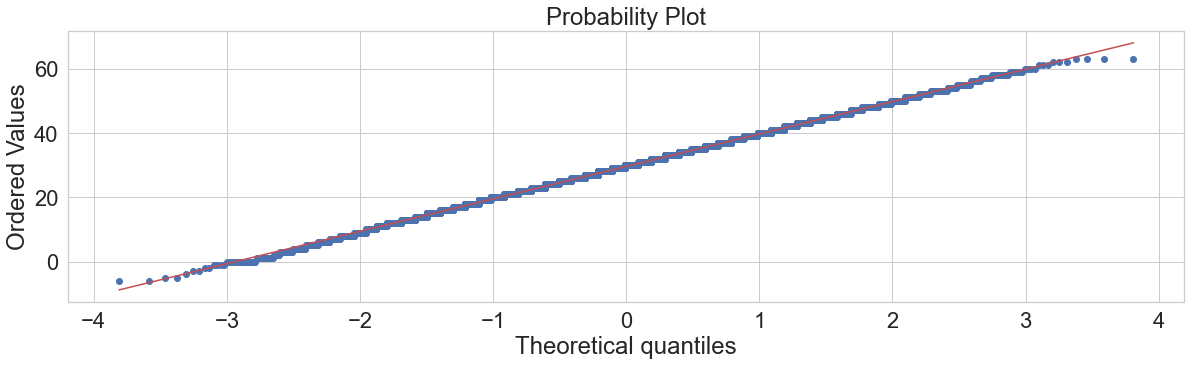

In [41]:
# визуализируем на qq-графике
from scipy import stats

fig = plt.figure()
ax = fig.add_subplot()
stats.probplot(g_A.events, plot=ax)
plt.show()

In [42]:
# проведем аналогичные тесты для двух других подвыборок

In [43]:
shapiro(g_B.events.sample(1000, random_state=17))

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

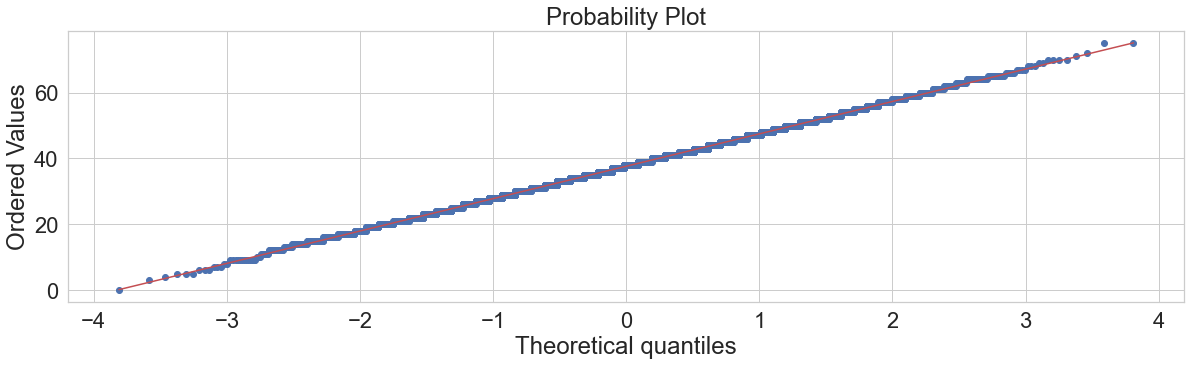

In [44]:
from scipy import stats

fig = plt.figure()
ax = fig.add_subplot()
stats.probplot(g_B.events, plot=ax)
plt.show()

In [45]:
shapiro(g_C.events.sample(1000, random_state=17))

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

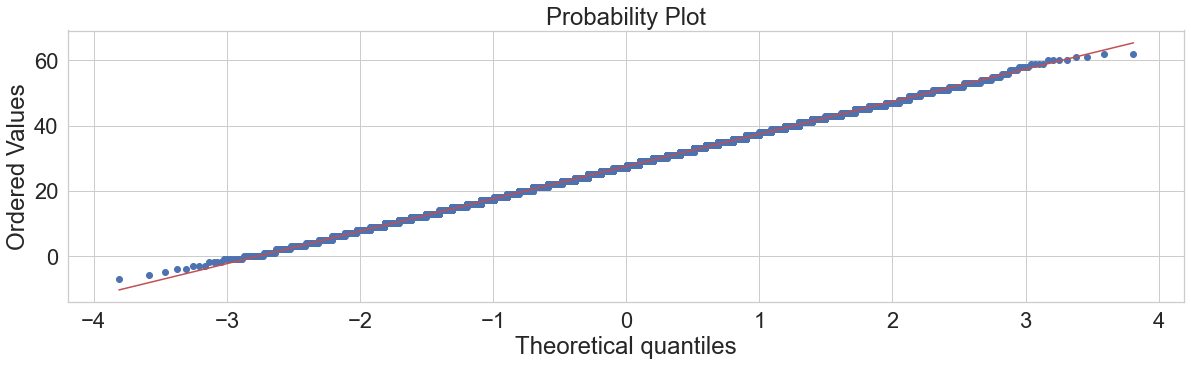

In [46]:
from scipy import stats

fig = plt.figure()
ax = fig.add_subplot()
stats.probplot(g_C.events, plot=ax)
plt.show()

In [47]:
# для оценки различий выборок применим однофакторный дисперсионный анализ
stats.f_oneway(g_A.events, g_B.events, g_C.events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [48]:
# значение p уровня значимости близко к нулю, можно полагать наличие статистически значимых различий

In [49]:
# проверим с помощью критерия Тьюки, который учитывает множетсвенные сравнения, между какими группами есть различия

In [50]:
print(pairwise_tukeyhsd(test1.events, test1.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


In [51]:
# Тьюки показал, что различия есть между каждой парой групп

Text(0, 0.5, 'Количество заказов')

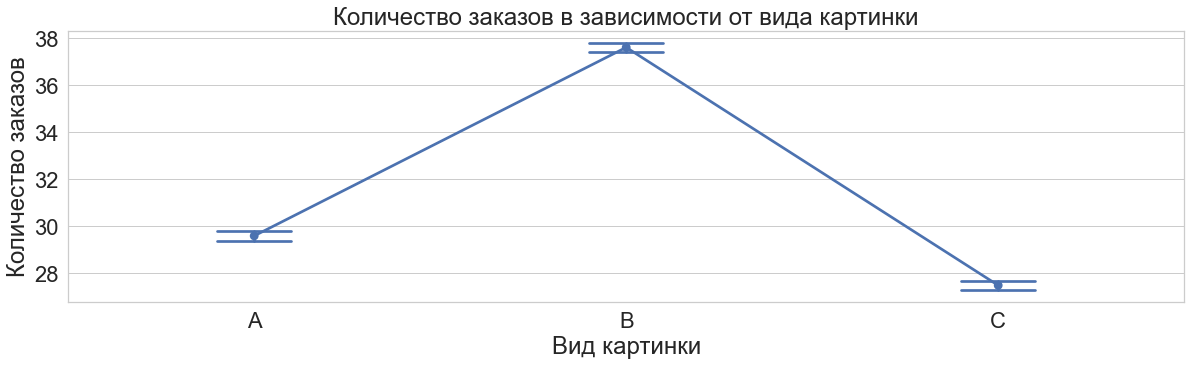

In [52]:
# визуализируем доверительные интервалы количества заказов
sns.pointplot(x = 'group', y = 'events', data = test1, capsize = .2)
plt.title('Количество заказов в зависимости от вида картинки')
plt.xlabel('Вид картинки')
plt.ylabel('Количество заказов')

**Вывод: наилучшие и статистически значимые результаты показывают квадратные картинки (группа В)**

### Задача 2
Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.
    Проанализировать результаты

In [20]:
path = 'https://stepik.org/media/attachments/lesson/385920/5_task_2.csv'

In [21]:
test2 = pd.read_csv(path) #, parse_dates=['timestamp'])
test2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [22]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  int64  
 1   group    100000 non-null  object 
 2   segment  100000 non-null  object 
 3   events   100000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ MB


In [23]:
test2.describe()

,id,events
count,100000.000000,100000.000000
mean,49999.500000,34.213930
std,28867.657797,17.585193
min,0.000000,4.000000
25%,24999.750000,21.000000
50%,49999.500000,29.000000
75%,74999.250000,40.000000
max,99999.000000,102.000000


In [24]:
test2.isna().sum()

id         0
group      0
segment    0
events     0
dtype: int64

In [25]:
g_test = test2[test2.group == 'test']
g_control = test2[test2.group == 'control']

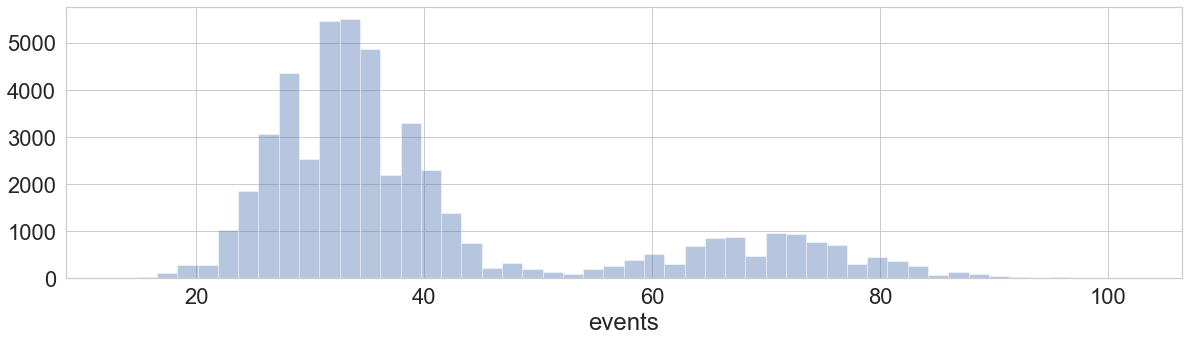

In [35]:
# визуализируем распределение количества событий для обоих подвыборок
sns.distplot(g_test.events ,kde=False);

<AxesSubplot:xlabel='events'>

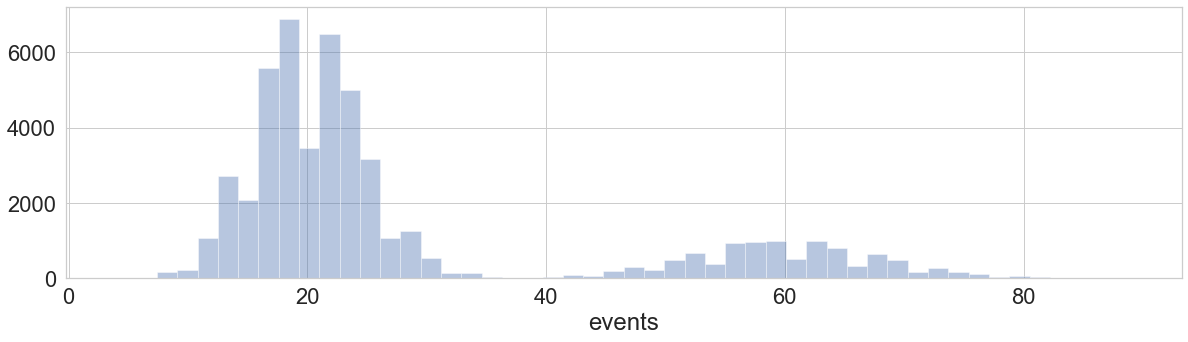

In [36]:
sns.distplot(g_control.events ,kde=False)

In [37]:
# медиана, среднее и стандартное отклонения для обеих групп и каждого сегмента
test2.groupby(['group', 'segment'], as_index=False) \
        .agg({'events': ['mean', 'median', 'std']})

group segment     events                 
                         mean median       std
0  control    high  59.970800   60.0  7.805347
1  control     low  20.031575   20.0  4.473576
2     test    high  69.938500   70.0  8.403974
3     test     low  33.025925   33.0  5.720845

In [38]:
# применяем многофакторный дисперсионный анализ, где события - ЗП, группа и сегмент - НП
formula = 'events ~ segment + group + segment:group'
model = ols(formula, test2).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377485,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


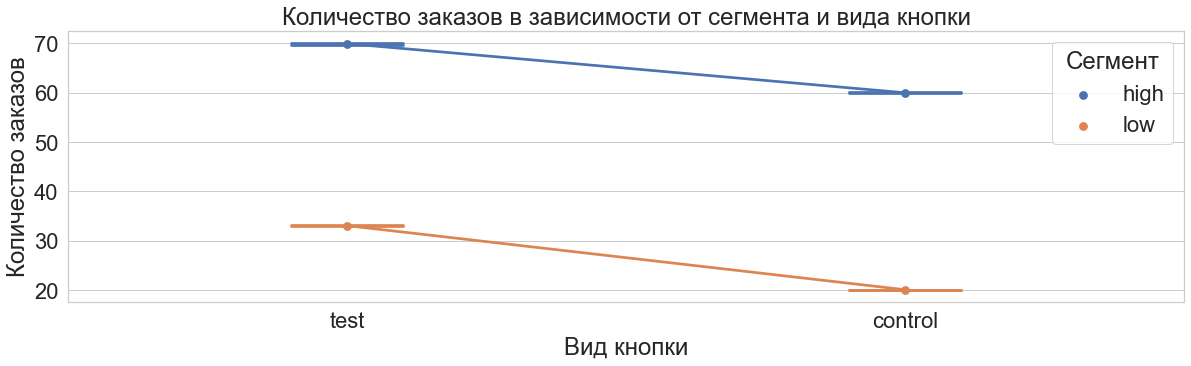

In [39]:
sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = test2, capsize = .2)
plt.title('Количество заказов в зависимости от сегмента и вида кнопки')
plt.xlabel('Вид кнопки')
plt.ylabel('Количество заказов')
plt.legend(title = 'Сегмент')

In [40]:
test2['combination'] = test2.group + "/" + test2.segment

In [57]:
test2.head(2)

,id,group,segment,events,combination
0,83440,test,high,78.0,test/high
1,96723,test,high,71.0,test/high


In [58]:
test2.combination.unique()

array(['test/high', 'control/high', 'test/low', 'control/low'],
      dtype=object)

In [59]:
# с помощью критерия Тьюки сравним пары сочетаний группы и сегмента
print(pairwise_tukeyhsd(test2.events, test2.combination))

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2   meandiff p-adj  lower    upper   reject
----------------------------------------------------------------
control/high control/low -39.9392 0.001 -40.1073 -39.7711   True
control/high   test/high   9.9677 0.001   9.7551  10.1803   True
control/high    test/low -26.9449 0.001  -27.113 -26.7768   True
 control/low   test/high  49.9069 0.001  49.7388   50.075   True
 control/low    test/low  12.9944 0.001   12.888  13.1007   True
   test/high    test/low -36.9126 0.001 -37.0807 -36.7445   True
----------------------------------------------------------------


Оба фактора - и группы и сегмента статистически значимы и в обоих случаях новое решение показало лучшие результаты. Значит, нужно его принимать.